#  Dimensionality Reduction with PCA

In [1]:
%matplotlib inline

# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

plt.rcParams.update({'font.size': 15})

In [2]:
# Import custom classes
%run -i '../src/helper/01_transfxn.py'

In [3]:
# Instantiate the classes
transfxn = TransformationPipeline()

# Load data

In [4]:
df = pd.read_csv('../data/feat_engr_data.csv') # load cleaned data
print('Data size',df.shape) # data size
df.head()

Data size (6771768, 26)


,c_case,c_year,c_mnth,c_wday,c_hour,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,p_sex,p_age,p_psn,p_isev,p_safe,p_user,class,count_p_isev,avg_p_age,c_conf_ind
0,752,1999,January,Monday,20.0,2.0,Right turn,NaN,Clear and sunny,Icy,...,M,41.0,Driver,No Injury,NaN,Motor Vehicle Driver,0,3,26.666667,N
1,752,1999,January,Monday,20.0,2.0,Right turn,NaN,Clear and sunny,Icy,...,M,19.0,Driver,No Injury,NaN,Motor Vehicle Driver,0,3,26.666667,N
2,752,1999,January,Monday,20.0,2.0,Right turn,NaN,Clear and sunny,Icy,...,F,20.0,"Front row, right outboard",Injury,Safety device used,Motor Vehicle Passenger,0,3,26.666667,N
3,753,1999,January,Monday,8.0,1.0,Hit a moving object,NaN,"Freezing rain, sleet, hail",Snow,...,M,46.0,Driver,No Injury,NaN,Motor Vehicle Driver,0,2,25.500000,N
4,753,1999,January,Monday,8.0,1.0,Hit a moving object,NaN,"Freezing rain, sleet, hail",Snow,...,M,5.0,Pedestrian,Injury,NaN,Pedestrian,0,2,25.500000,N


# Reduce dataset

In [5]:
X1, X2, y1, y2 = train_test_split(df, df['class'], test_size=0.1, 
                                  random_state=42, stratify=df['class']
                                 )

# Create features matrix

In [6]:
# Feature matrix and class label
cols_to_drop = ['c_case', 'p_id', 'v_id', 'class']
X, y = X2.drop(cols_to_drop, axis = 1), X2['class']

In [7]:
# Re-encode the class variable
y.replace({0:'Non-fatal', 1: 'Fatal'}, inplace=True)

# Data preprocessing

In [8]:
# Transform and scale data
X_scaled, _, feat_nm = transfxn.preprocessing(X, X)

In [9]:
print('Data size after pre-processing:', X_scaled.shape)

Data size after pre-processing: (677177, 155)


# PCA plot

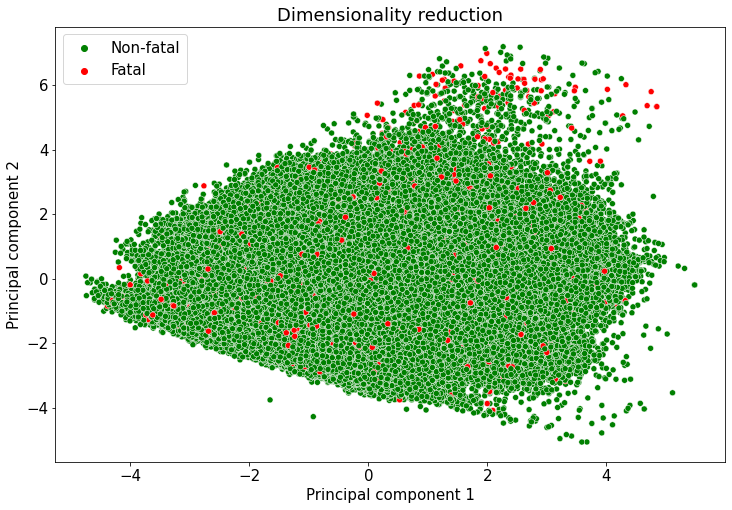

In [10]:
transfxn.pca_plot_labeled(X_scaled, y, palette=['g', 'r'])